In [1]:
%matplotlib widget
import os  
import sys  
sys.path.insert(0, os.getenv('HOME')+'/pycode/MscThesis/')
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.pipeline.paths.directory import *
from amftrack.util import *
from amftrack.notebooks.post_processing.util import *
import pickle
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, save_graphs, load_graphs

directory = directory_project
# directory = '/projects/0/einf914/agg/'

# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)
analysis_info['Plate']=analysis_info['Plate'].fillna(758)
select = analysis_info

/home/cbisot/pycode/MscThesis/amftrack/transfer/functions/transfer.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext memory_profiler

In [6]:


from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(1000000)



0 799



Filename: /gpfs/home2/cbisot/pycode/MscThesis/amftrack/pipeline/control/mprun_demo.py

Line #    Mem usage    Increment  Occurences   Line Contents
    43   6266.9 MiB   6266.9 MiB           1   def sum_of_lists(N):
    44                                         
    45   6266.9 MiB      0.0 MiB           1       directory = directory_project
    46   6266.9 MiB      0.0 MiB           1       update_analysis_info(directory)
    47   6266.9 MiB      0.0 MiB           1       analysis_info = get_analysis_info(directory)
    48   6266.9 MiB      0.0 MiB           1       select = analysis_info
    49   6266.9 MiB      0.0 MiB           1       num = 1
    50   6266.9 MiB      0.0 MiB          20       rows = [row for (index, row) in select.iterrows()]
    51   6266.9 MiB      0.0 MiB           1       for index,row in enumerate(rows):
    52   6266.9 MiB      0.0 MiB           1           path = f'{directory}{row["folder_analysis"]}'
    53   6266.9 MiB      0.0 MiB           1           

In [18]:
%%file mprun_demo.py
def sum_of_lists(N):
    %matplotlib widget
    import sys  
    sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
    from amftrack.pipeline.functions.post_processing.extract_study_zone import *
    import pandas as pd
    import ast
    from amftrack.plotutil import plot_t_tp1
    from scipy import sparse
    from datetime import datetime
    import pickle
    import scipy.io as sio
    from pymatreader import read_mat
    from matplotlib import colors
    import cv2
    import imageio
    import matplotlib.pyplot as plt
    import numpy as np
    from skimage.filters import frangi
    from skimage import filters
    from random import choice
    import scipy.sparse
    import os
    from skimage.feature import hessian_matrix_det
    from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
    from amftrack.notebooks.analysis.util import * 
    from scipy import stats
    from scipy.ndimage.filters import uniform_filter1d
    from collections import Counter
    from IPython.display import clear_output
    from amftrack.notebooks.analysis.data_info import *
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"
    plt.rcParams.update({
        "font.family": "verdana",
    'font.weight' : 'normal',
    'font.size': 20})
    from amftrack.plotutil import plot_node_skel
    from amftrack.notebooks.validation.util import *
    from amftrack.pipeline.paths.directory import *
    from amftrack.util import *
    from amftrack.notebooks.post_processing.util import *
    import pickle

    directory = directory_project
    update_analysis_info(directory)
    analysis_info = get_analysis_info(directory)
    select = analysis_info
    num = 0
    rows = [row for (index, row) in select.iterrows()]
    for index,row in enumerate(rows):
        path = f'{directory}{row["folder_analysis"]}'
        print(index,row["Plate"])
        try:
            a = np.load(f'{path}/center.npy')
        except:
            print(index,row["Plate"])
        if index == num:
            path_exp = f'{directory}{row["path_exp"]}'
            exp = pickle.load(open(path_exp, "rb"))
            exp.dates.sort()
            break

Overwriting mprun_demo.py


In [3]:
plate = 152
rows = [row for (index, row) in select.iterrows()]
for index,row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    try:
        a = np.load(f'{path}/center.npy')
    except:
        print(index,row["Plate"])
    if row["Plate"]== plate:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

4 22


In [4]:
exp.labeled = True
load_graphs(exp,indexes = [0])

In [17]:
load_graphs(exp)
exp.nx_graph

In [6]:
from amftrack.pipeline.functions.post_processing.extract_study_zone import load_study_zone
load_study_zone(exp)

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


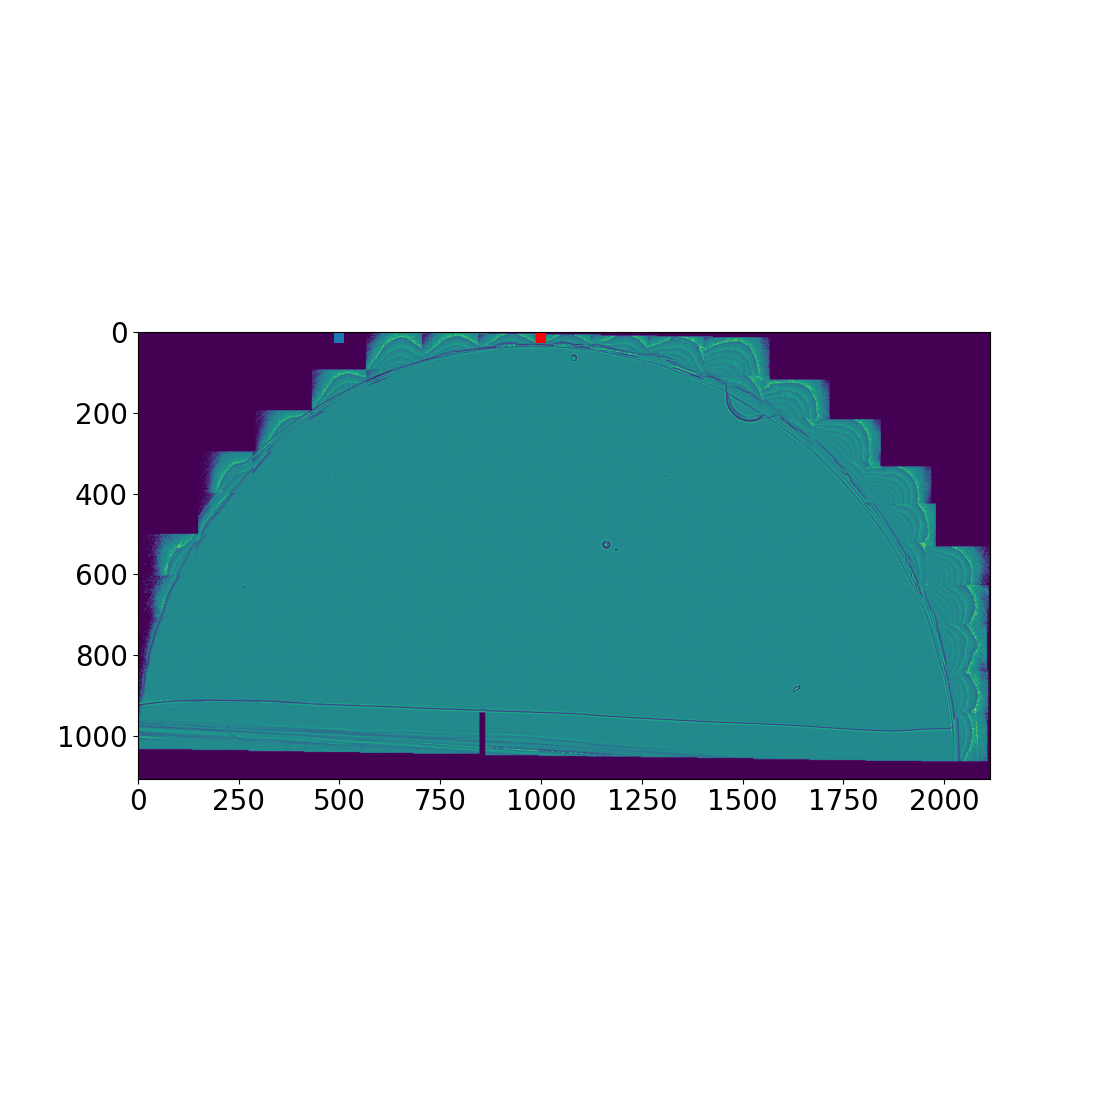

In [5]:
plt.close('all')
i=0
dist = 150
radius = 1000
compress = 25
dr_orth, dr_center = get_study_zone(exp,dist,radius,i)

In [6]:
save_study_zone(dr_orth,dr_center,exp,i)

In [9]:
x0,y0 = exp.center
x0,y0

(25325, 26900)

In [12]:
dist = 150
radius = 1000

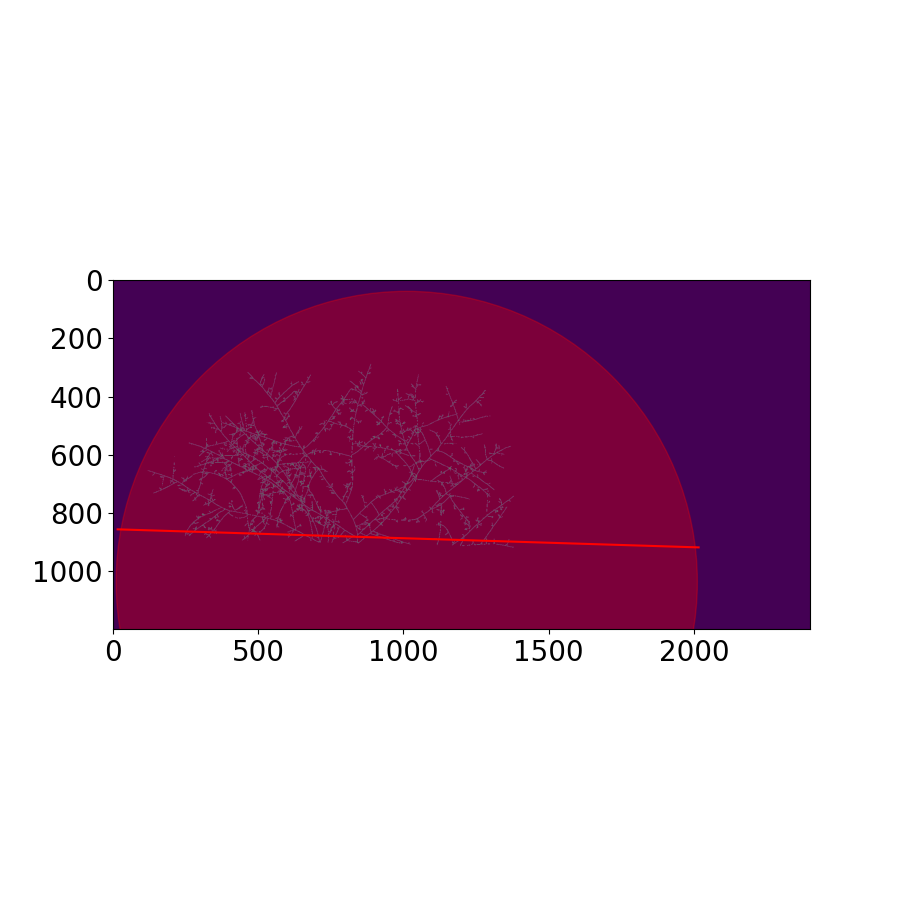

In [18]:
end = 70
plt.close('all')
compress = 25
date = exp.dates[end]
directory_name = get_dirname(date,exp.plate)
path_snap = exp.directory + directory_name
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
skelet = skel['skeleton']
output = skelet.todense()
kernel = np.ones((5,5),np.uint8)
output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 3)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
x,y = np.array(exp.center)[0]//compress, np.array(exp.center)[1]//compress
circle = plt.Circle((x,y),radius,alpha = 0.3,color= 'red')
pos_line = np.array((x,y))+dist*exp.orthog
orth_direct = np.array([exp.orthog[1],-exp.orthog[0]])
extension = 1000
deb_line = pos_line + extension*orth_direct
end_line = pos_line - extension*orth_direct
line = pltlines.Line2D((deb_line[0],end_line[0]),(deb_line[1],end_line[1]),color='red')
ax.add_patch(circle)
ax.add_line(line)
ax.imshow(cv2.resize(output,(output.shape[1]//compress,output.shape[0]//compress)),alpha = 1)


In [11]:
exp.reach_out = end 

In [8]:
path = f'{directory}{row["folder_analysis"]}'
np.save(f'{path}/center',exp.center)
np.save(f'{path}/orthog',exp.orthog)
np.save(f'{path}/reach_out',exp.reach_out)

In [22]:
path

'/projects/0/einf914/agg/Analysis_1637835577887434375_0_25_Version9'

In [13]:
plt.close('all')
frame = exp.reach_out
plot_raw2(exp,frame)

NameError: name 'plot_raw2' is not defined

In [14]:
exp.num_trunk = 8

In [15]:
path = f'{directory}{row["folder_analysis"]}'
np.save(f'{path}/num_trunk',exp.num_trunk)

In [18]:
def plot_raw2(exp, t,figsize = (10,9)):
    date = exp.dates[t]
    directory_name = get_dirname(date,exp.plate)
    path_snap = exp.directory + directory_name
    im = read_mat(path_snap+'/Analysis/raw_image.mat')['raw']
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.imshow(im,cmap = "gray")

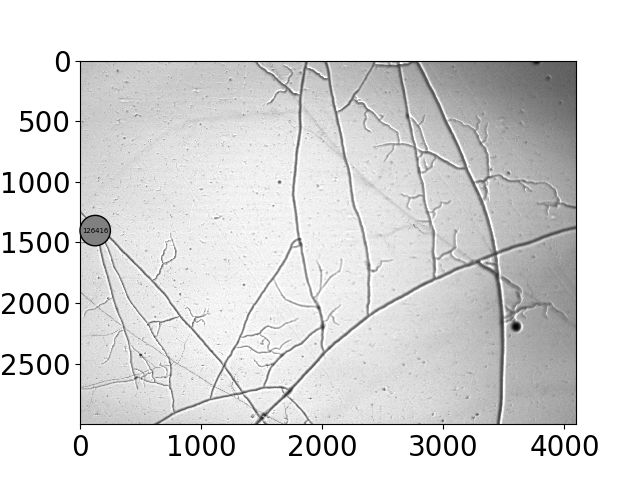

In [19]:
Node(126416, exp).show_source_image(90,90)

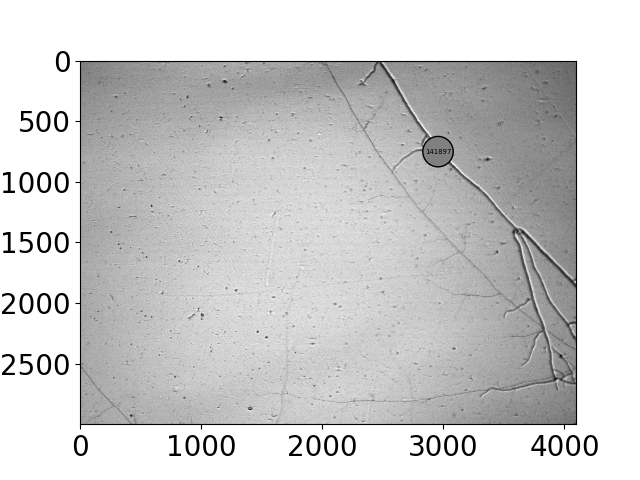

In [18]:
Edge(Node(126416, exp),Node(141897, exp)).show_source_image(90,90)

In [22]:
len(Edge(Node(126416, exp),Node(141897, exp),exp).pixel_list(90))

982

In [5]:
def get_width_info(experiment,t,resolution = 50,skip=False):
    print(not skip)
    edge_width={}
    graph = experiment.nx_graph[t]
#     print(len(list(graph.edges)))
    # print(len(graph.edges))
    print(len(graph.edges))
    # list_edges = [choice(list(graph.edges)) for i in range(100)]
    for edge in graph.edges:
        if not skip:
            # print(edge)
            edge_exp = Edge(Node(edge[0],experiment),Node(edge[1],experiment),experiment)
            mean = np.mean(list(get_width_edge(edge_exp,resolution,t).values()))
    #         print(np.mean(list(get_width_edge(edge_exp,resolution,t).values())))
            edge_width[edge]=mean
            # print(mean)
        else:
           #Maybe change to Nan if it doesnt break the rest
            edge_width[edge]=40
    return(edge_width)

In [6]:
%%time
get_width_info(exp,90,resolution = 50)

True
3361
CPU times: user 11min 16s, sys: 8min 40s, total: 19min 56s
Wall time: 20min 20s


{(34006, 73474): 9.612675112375923,
 (73446, 73474): 7.883159312472247,
 (73474, 66900): 8.868443673647091,
 (66900, 73520): 7.38230246349865,
 (66900, 60380): 8.64093034203077,
 (25219, 65009): 10.22228105053245,
 (65009, 65026): 6.2131323258844775,
 (65009, 71620): 8.597305320464958,
 (66922, 127687): 5.136192816502194,
 (127687, 73520): 6.9394187106901,
 (127687, 127693): 7.541627914549913,
 (73509, 73520): 5.920248841877464,
 (65026, 125163): 8.895471532584013,
 (65026, 34973): 9.19262013042849,
 (17186, 153371): 18.18917744157656,
 (71644, 125228): 4.843846452343988,
 (125228, 125247): 4.500905772199571,
 (125228, 71620): 6.54773738159614,
 (60380, 65297): 6.935215988934161,
 (60380, 54103): 9.001304341889263,
 (66953, 125532): 5.610571615019251,
 (71620, 125149): 5.679935487160246,
 (71620, 125163): 8.617006021918272,
 (125149, 125163): 6.110558455164888,
 (125149, 125139): 4.9234023915924086,
 (153371, 25526): 21.10654944598961,
 (153371, 116977): 10.080307324413335,
 (125532, 6

In [4]:
from skimage.measure import profile_line
from amftrack.notebooks.analysis.util import *
from scipy.optimize import curve_fit
import numpy as np
a = 2.3196552
from scipy import special
def func2(x,lapse, lapse2,c,d,e):
    return(-c*(special.erf(e*(x-lapse))-special.erf(e*(x-lapse-lapse2)))+d)
def func3(x, lapse,lapse2,c,d,e,lapse4):
    return(-c*(special.erf(e*(x-lapse))-special.erf(e*(x-(lapse+lapse2))))+d+c*(special.erf(e*(x-(lapse+lapse2)))-special.erf(e*(x-(lapse+lapse2+lapse4)))))
def func4(x, lapse,lapse2,c,d,e,lapse4):
    return(-c*(special.erf(e*(x-lapse))-special.erf(e*(x-(lapse+lapse2))))+d+c*(special.erf(e*(x-(lapse-lapse4)))-special.erf(e*(x-(lapse)))))
def func5(x, sigma, mean,fact,offset):
    return(-fact*np.exp(-(x-mean)**2/sigma**2)+offset)
def func5(x, sigma, mean,fact,offset):
    return(-fact*np.exp(-(x-mean)**2/sigma**2)+offset)
def get_source_image(experiment,pos,t,local,force_selection = None):
    x,y=pos[0],pos[1]
    ims,posimg=experiment.find_image_pos(x,y,t,local)
    if force_selection is None:
        dist_border=[min([posimg[1][i],3000-posimg[1][i],posimg[0][i],4096-posimg[0][i]]) for i in range(posimg[0].shape[0])]
        j=np.argmax(dist_border)
    else:
        dist_last=[np.linalg.norm(np.array((posimg[1][i],posimg[0][i])) - np.array(force_selection)) for i in range(posimg[0].shape[0])]
        j=np.argmin(dist_last)
    return(ims[j],(posimg[1][j],posimg[0][j]))

def get_width_pixel(edge,index,im,pivot,before,after,t,size = 20,width_factor = 60,averaging_size = 100,threshold_averaging = 10):
    imtab=im
#     print(imtab.shape)
#     print(int(max(0,pivot[0]-averaging_size)),int(pivot[0]+averaging_size))
    threshold = np.mean(imtab[int(max(0,pivot[0]-averaging_size)):int(pivot[0]+averaging_size),int(max(0,pivot[1]-averaging_size)):int(pivot[1]+averaging_size)]-threshold_averaging)
    orientation=np.array(before)-np.array(after)
    perpendicular = [1,-orientation[0]/orientation[1]] if orientation[1]!=0 else [0,1]
    perpendicular_norm=np.array(perpendicular)/np.sqrt(perpendicular[0]**2+perpendicular[1]**2)
    point1=np.around(np.array(pivot)+width_factor*perpendicular_norm)
    point2=np.around(np.array(pivot)-width_factor*perpendicular_norm)
    point1=point1.astype(int)
    point2=point2.astype(int)
    p = profile_line(imtab, point1, point2,mode='constant')
    xdata = np.array(range(len(p)))
    ydata = np.array(p)
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot(xdata,ydata)
#     ax.plot(xdata, func5(xdata, *popt0), 'g-')
    # try:
    #     raise RuntimeError
    # #     p00=[10,60,60,160]
    # #     popt0, pcov = curve_fit(func5, xdata, ydata,bounds = ([0,0,0,0],4*[np.inf]),p0=p00)
    # #     p0a=[60,10,100,180,0.1]
    # #     popt1, pcov = curve_fit(func2, xdata, ydata,bounds = ([0,0,0,0,0],[120,120,200]+2*[np.inf]),p0=p0a)
    # #     p0b=list(popt1)+[10]
    # #     popt2, pcov = curve_fit(func3, xdata, ydata,bounds = ([0,0,0,0,0,0],[120,120,200]+2*[np.inf]+[120]),p0=p0b)
    # #     residuals = ydata- func3(xdata, *popt2)
    # #     ss_res = np.sum(residuals**2)
    # #     ss_tot = np.sum((ydata-np.mean(ydata))**2)
    # #     r_squared1 = 1 - (ss_res / ss_tot)
    # #     popt3, pcov = curve_fit(func4, xdata, ydata,bounds = ([0,0,0,0,0,0],[120,120,200]+2*[np.inf]+[120]),p0=p0b)
    # #     residuals = ydata- func4(xdata, *popt3)
    # #     ss_res = np.sum(residuals**2)
    # #     ss_tot = np.sum((ydata-np.mean(ydata))**2)
    # #     r_squared2 = 1 - (ss_res / ss_tot)
    # # #     ax.plot(xdata, func2(xdata, *popt1), 'r-')
    # #     if r_squared1>r_squared2:
    # # #         ax.plot(xdata, func3(xdata, *popt2), 'b-')
    # #         popt=popt2
    # #     else:
    # # #         ax.plot(xdata, func4(xdata, *popt3), 'b-')
    # #         popt=popt3
    # #     background = popt[3]
    # except RuntimeError:
    #     print('failed')
    background = np.mean((np.mean(p[:width_factor//6]),np.mean(p[-width_factor//6:])))
#     print(popt[3],popt0[3])
#     width_pix = popt0[0]*popt0[2]
    width_pix = -np.sum((np.log10(np.array(p)/background)<=0)*np.log10(np.array(p)/background))
#     print(width_pix)
#     p0=[165,100,165,45,10,10,10]
#     popt, pcov = curve_fit(func, xdata, ydata,bounds = ([-np.inf,-np.inf,-np.inf,-np.inf,0,0,0],np.inf),p0=p0)
#     width_pix = popt[-2]
#     ax.plot(xdata, func(xdata, *popt), 'r-')
#     derivative = [p[i+1]-p[i] for i in range(len(p)-1)]
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.plot([np.mean(derivative[5*i:5*i+5]) for i in range(len(derivative)//5)])
#     problem=False
#     arg = len(p)//2
#     if p[arg]>threshold:
#         arg = np.argmin(p)
# #     we_plot=randrange(1000)
#     while  p[arg]<=threshold:
#         if arg<=0:
# #             we_plot=50
#             problem=True
#             break
#         arg-=1
#     begin = arg
#     arg = len(p)//2
#     if p[arg]>threshold:
#         arg = np.argmin(p)
#     while  p[arg]<=threshold:
#         if arg>=len(p)-1:
# #             we_plot=50
#             problem=True
#             break
#         arg+=1
#     end = arg
# #     print(end-begin,threshold)
#     print(np.linalg.norm(point1-point2),len(p),width_pix)
    return(a*np.sqrt(max(0,np.linalg.norm(point1-point2)*(width_pix)/len(p))))

def get_width_edge(edge,resolution,t,local=False, threshold_averaging = 10):
    pixel_conversion_factor = 1.725
    pixel_list = edge.pixel_list(t)
    pixels = []
    indexes = []
    source_images = []
    poss = []
    widths={}
    if len(pixel_list)>3*resolution:
        for i in range(0,len(pixel_list)//resolution):
            index = i*resolution
            indexes.append(index)
            pixel = pixel_list[index]
            pixels.append(pixel)
            source_img,pos = get_source_image(edge.experiment,pixel,t,local)
            source_images.append(source_img)
            poss.append(pos)
    else:
        indexes = [0,len(pixel_list)//2,len(pixel_list)-1]
        for index in indexes:
            pixel = pixel_list[index]
            pixels.append(pixel)
            source_img,pos = get_source_image(edge.experiment,pixel,t,local)
            source_images.append(source_img)
            poss.append(pos)
#     print(indexes)
    for i, index in enumerate(indexes[1:-1]):
        source_img = source_images[i+1]
        pivot = poss[i+1]
        _,before = get_source_image(edge.experiment,pixels[i],t,local,pivot)
        _,after = get_source_image(edge.experiment,pixels[i+2],t,local,pivot)
#         plot_t_tp1([0,1,2],[],{0 : pivot,1 : before, 2 : after},None,source_img,source_img)
        width = get_width_pixel(edge,index,source_img,pivot,before,after,t,threshold_averaging = threshold_averaging)
#         print(width*pixel_conversion_factor)
        widths[pixel_list[index]]=width*pixel_conversion_factor
#         if i>=1:
#             break
    edge.experiment.nx_graph[t].get_edge_data(edge.begin.label,edge.end.label)['width'] = widths
    return(widths)      



In [18]:
path = f'{directory}{row["folder_analysis"]}'
exp.pickle_save(path)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


KeyboardInterrupt: 

In [27]:
select

,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,date,Pbait,date_begin,date_end,number_timepoints,path_exp,path_analysis_info,date_run_analysis
1,Analysis_1635750896167548219_Version2,Version2,88,17,Carrot,A5,001P100N,Y,None,20210915,"22.09.2021, 23:13:",-,20210915_1507_Plate17,20211006_0900_Plate17,155,Analysis_1635750896167548219_Version2/experime...,Analysis_1635750896167548219_Version2/static_i...,"01.11.2021, 08:14:"
2,Analysis_1635751018325961431_Version2,Version2,799,39,Carrot,A5,001P100N,Y,None,20211001,"03.10.2021, 01:47:",-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1635751018325961431_Version2/experime...,Analysis_1635751018325961431_Version2/static_i...,"01.11.2021, 08:16:"
7,Analysis_1635751166598733830_Version2,Version2,94,39,Carrot,A5,001P100N,Y,25,20201123,"24.11.2020, 12:02:",None,20201123_1253_Plate39,20201210_1156_Plate39,169,Analysis_1635751166598733830_Version2/experime...,Analysis_1635751166598733830_Version2/static_i...,"01.11.2021, 08:19:"
9,Analysis_1635750893830401869_Version2,Version2,80,36,Carrot,A5,001P100N,Y,None,20201127,"03.12.2020, 09:55:",-,20201128_1802_Plate36,20201206_2113_Plate36,47,Analysis_1635750893830401869_Version2/experime...,Analysis_1635750893830401869_Version2/static_i...,"01.11.2021, 08:14:"
10,Analysis_1635751691653010318_Version2,Version2,26,39,Carrot,A5,001P100N,Y,None,20210104,"10.01.2021, 03:23:",-,20210106_1122_Plate30,20210113_2325_Plate30,44,Analysis_1635751691653010318_Version2/experime...,Analysis_1635751691653010318_Version2/static_i...,"01.11.2021, 08:28:"
13,Analysis_1635750755355010260_Version2,Version2,22,29,Carrot,A5,001P100N,Y,None,20210107,"12.01.2021, 11:20:",-,20210107_1119_Plate29,20210112_2320_Plate29,31,Analysis_1635750755355010260_Version2/experime...,Analysis_1635750755355010260_Version2/static_i...,"01.11.2021, 08:12:"
14,Analysis_1635750776460268294_Version2,Version2,10,36,Carrot,A5,001P100N,Y,None,20210107,"11.01.2021, 15:33:",-,20210107_1140_Plate36,20210112_2333_Plate36,31,Analysis_1635750776460268294_Version2/experime...,Analysis_1635750776460268294_Version2/static_i...,"01.11.2021, 08:12:"
17,Analysis_1635751724713025062_Version2,Version2,91,37,Carrot,A5,001P100N,Y,None,20201217,"26.12.2020, 07:42:",-,20201217_1611_Plate37,20210105_2338_Plate37,112,Analysis_1635751724713025062_Version2/experime...,Analysis_1635751724713025062_Version2/static_i...,"01.11.2021, 08:28:"
18,Analysis_1635752856157447067_Version2,Version2,76,38,Carrot,A5,001P100N,Y,None,20210108,"10.01.2021, 11:44:",-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1635752856157447067_Version2/experime...,Analysis_1635752856157447067_Version2/static_i...,"01.11.2021, 08:47:"


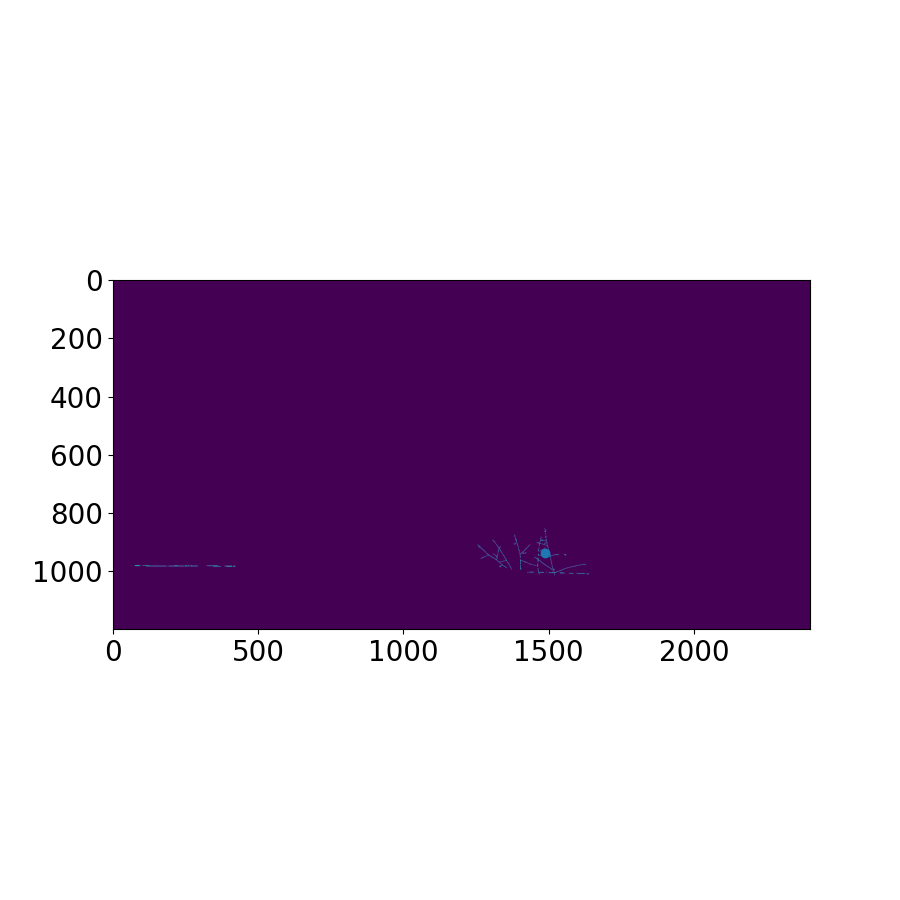

In [4]:
plt.close('all')
compress = 25
date = exp.dates[i]
directory_name = get_dirname(date,exp.plate)
path_snap = exp.directory + directory_name
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
skelet = skel['skeleton']
output = skelet.todense()
kernel = np.ones((5,5),np.uint8)
output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 3)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.imshow(cv2.resize(output,(output.shape[1]//compress,output.shape[0]//compress)),alpha = 1)
plt.scatter(exp.center[0]//compress,exp.center[1]//compress)

In [126]:
Node(77,exp)

Node(77)

In [33]:
is_in_study_zone(Node(223,exp),t)

(False, True)

In [70]:
np.all((True,False))

False

In [13]:
t= 0
compress = 25
center = np.array(exp.center)
poss = exp.positions[t]
x0,y0 = exp.center
direction = exp.orthog
pos_line = np.array((x0,y0))+dist*compress*direction
x_line,y_line = pos_line[0],pos_line[1]
orth_direct = np.array([direction[1],-direction[0]])
x_orth,y_orth = orth_direct = orth_direct[0],orth_direct[1]
a = y_orth/x_orth
b = y_line-a*x_line
nodes_exclude = []
for node in exp.nx_graph[t].nodes:
    dist_center = np.linalg.norm(poss[node]-center)
    y,x = poss[node]
    if dist_center > radius*compress or a*x+b<y:
        nodes_exclude.append(node)


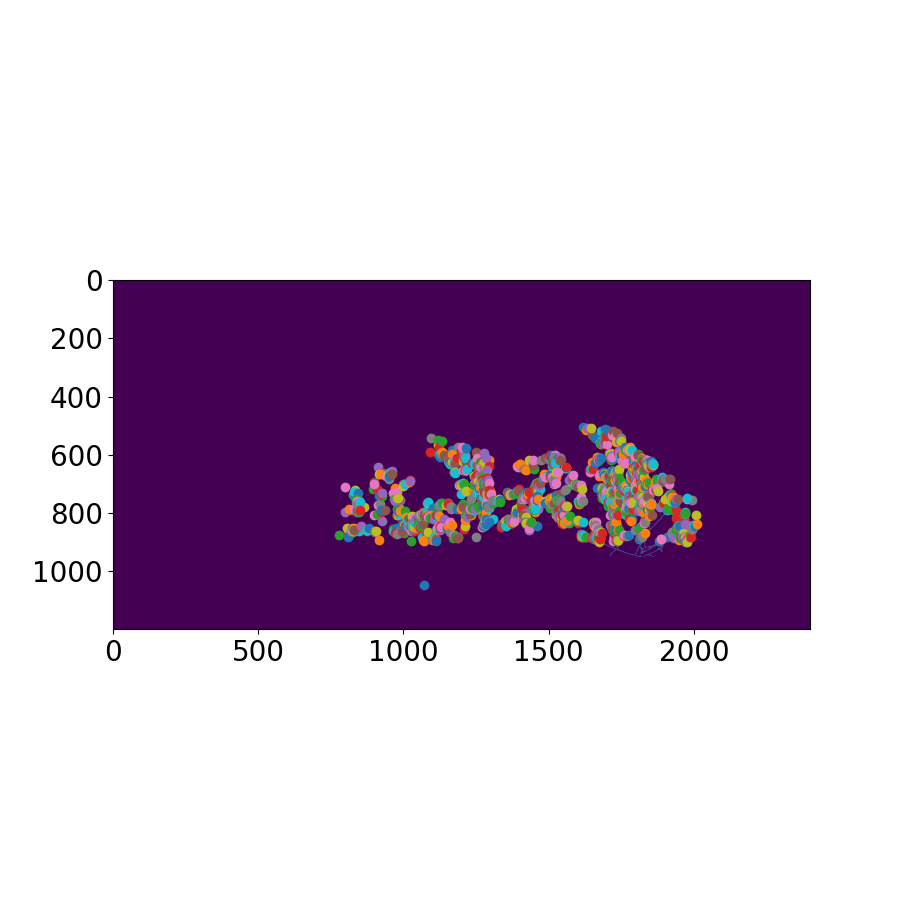

In [15]:
plt.close('all')
compress = 25
date = exp.dates[i]
directory_name = get_dirname(date,exp.plate)
path_snap = exp.directory + directory_name
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
skelet = skel['skeleton']
output = skelet.todense()
kernel = np.ones((5,5),np.uint8)
output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 3)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.imshow(cv2.resize(output,(output.shape[1]//compress,output.shape[0]//compress)),alpha = 1)
plt.scatter(exp.center[0]//compress,exp.center[1]//compress)
plt.scatter(x_line//compress,y_line//compress)
for node in exp.nx_graph[t].nodes:
    if node not in nodes_exclude:
        s=plt.scatter(*np.flip(poss[node])//compress)